In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Sleep_Data_Updated.csv')

df.head()

,Date,Day,Sleep Duration_hrs,Sleep Score,Quality,Stress Avg,Deep Sleep Duration_hrs,Light Sleep Duration_hrs,REM Duration_hrs,Awake Time_hrs,Avg SpO?,Lowest SpO2,Avg Respiration (bprm),Lowest Respiration (bprm),Steps,Resting Heart Rate (bpm),High Heart Rate (bpm)
0,1/2/2023,Monday,6.55,80.0,Good,8.0,1.23,4.17,1.15,0.08,0.94,0.79,17.0,12.0,8667,48,124
1,1/3/2023,Tuesday,5.95,76.0,Fair,11.0,1.17,3.78,1.15,0.07,0.95,0.87,17.0,13.0,6575,45,113
2,1/4/2023,Wednesday,7.50,82.0,Good,10.0,3.33,3.32,1.60,0.00,0.95,0.89,17.0,14.0,6078,43,116
3,1/5/2023,Thursday,7.83,98.0,Excellent,11.0,2.17,3.55,2.12,0.00,0.94,0.85,16.0,12.0,5739,44,102
4,1/6/2023,Friday,6.45,74.0,Fair,14.0,1.77,3.70,0.98,0.02,0.94,0.86,16.0,13.0,5705,47,104


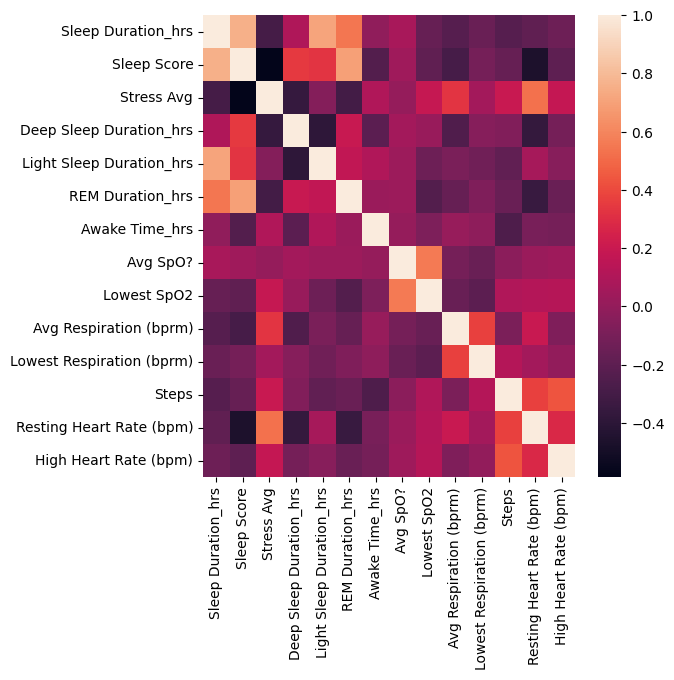

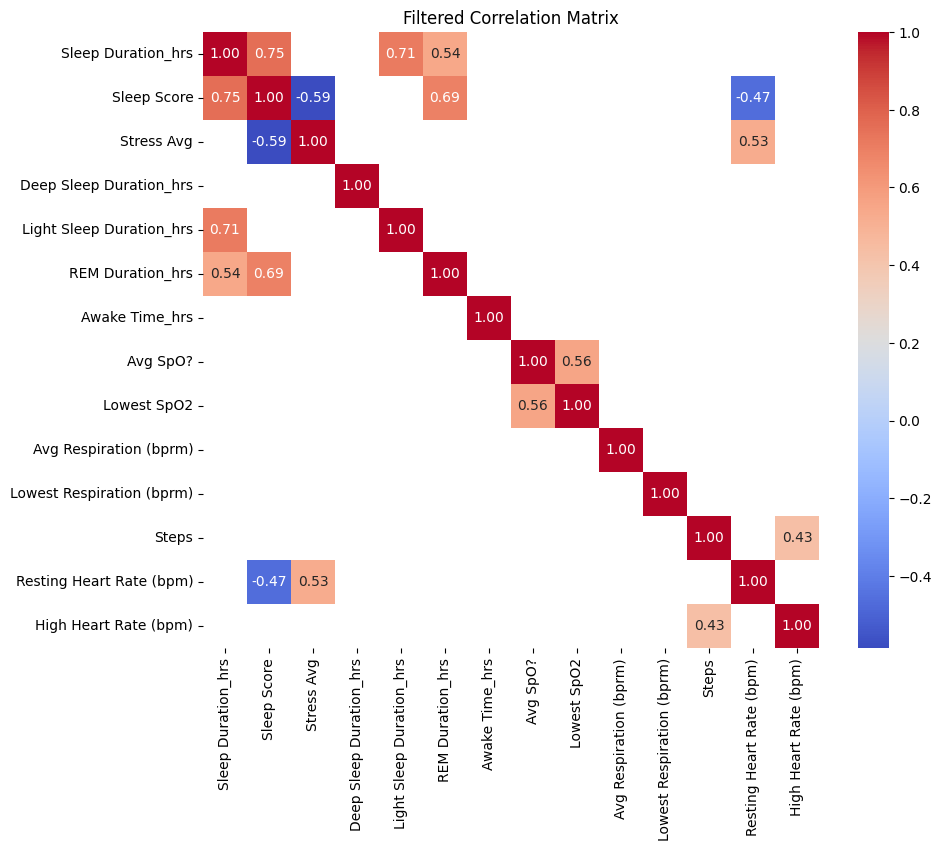

In [122]:
cols_to_keep = [
    'Sleep Duration_hrs', 'Sleep Score', 'Stress Avg',
    'Deep Sleep Duration_hrs', 'Light Sleep Duration_hrs',
    'REM Duration_hrs', 'Awake Time_hrs',  'Avg SpO?',	'Lowest SpO2',	'Avg Respiration (bprm)',	'Lowest Respiration (bprm)','Steps',
    'Resting Heart Rate (bpm)',	'High Heart Rate (bpm)'

]

# Select those columns from the DataFrame
new_data = df[cols_to_keep]
numeric_df = new_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

new_data_corr=new_data.corr()
plt.figure(figsize=(6,6))
sns.heatmap(data=new_data_corr)
filtered_corr = correlation_matrix.where((correlation_matrix > 0.4) | (correlation_matrix < -0.4))

# Create a heatmap for the filtered correlation matrix
plt.figure(figsize=(10, 8))
plt.title("Filtered Correlation Matrix")
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True)
plt.show()

In [123]:
# Extract relevant correlations
strong_correlations = filtered_corr.dropna(how='all', axis=1).dropna(how='all', axis=0)

# Extract column names with strong correlations
columns_to_extract = strong_correlations.columns

# Filter the original DataFrame for these columns
filtered_df = df[columns_to_extract]

# Display the extracted DataFrame
filtered_df.to_csv('filtered_df.csv')

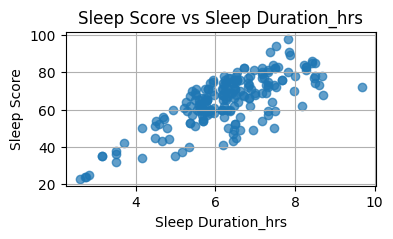

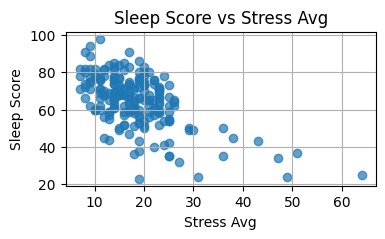

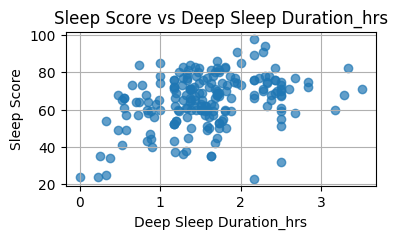

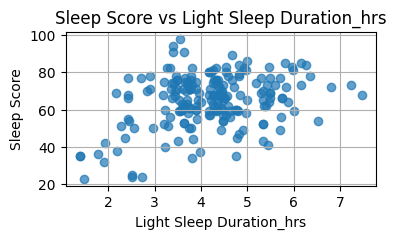

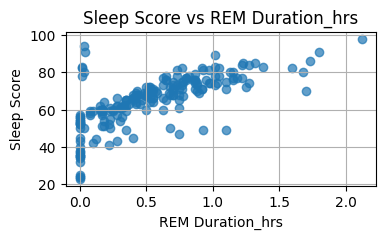

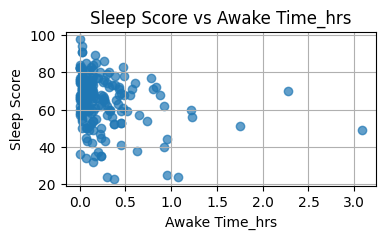

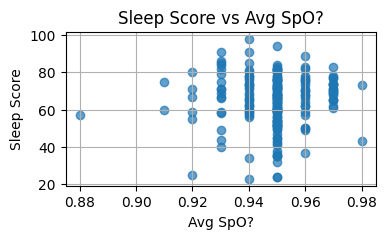

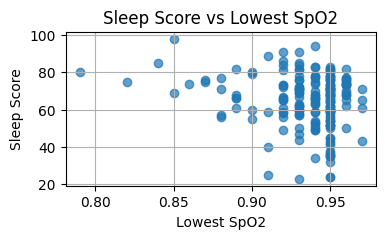

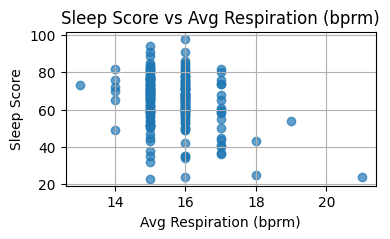

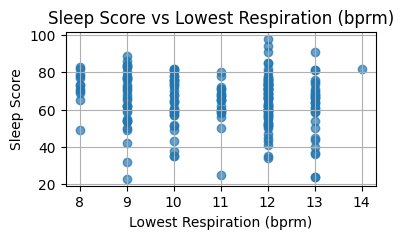

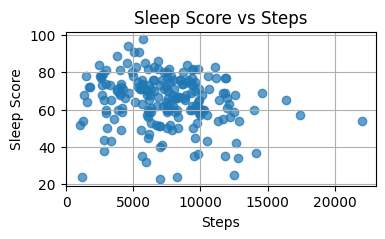

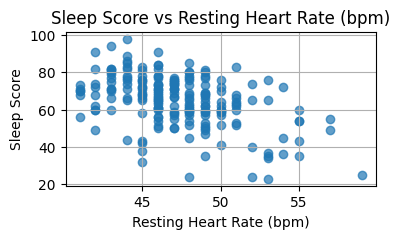

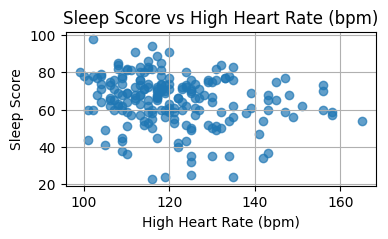

In [124]:
# Iterate through each column in the filtered DataFrame
for column in filtered_df.columns:
    if column != "Sleep Score":  # Exclude the "Sleep Score" column itself
        plt.figure(figsize=(4, 2))
        plt.scatter(filtered_df[column], filtered_df["Sleep Score"], alpha=0.7)
        plt.title(f"Sleep Score vs {column}")
        plt.xlabel(column)
        plt.ylabel("Sleep Score")
        plt.grid(True)
        plt.show()

In [125]:

# Calculate the mean of each column
column_means = filtered_df.mean()

# Display the mean values
print("Mean values of each column:")
print(column_means)


Mean values of each column:
Sleep Duration_hrs              6.29220
Sleep Score                    64.92500
Stress Avg                     18.23000
Deep Sleep Duration_hrs         1.57870
Light Sleep Duration_hrs        4.18650
REM Duration_hrs                0.53805
Awake Time_hrs                  0.23845
Avg SpO?                        0.94865
Lowest SpO2                     0.93545
Avg Respiration (bprm)         15.65000
Lowest Respiration (bprm)      10.99000
Steps                        7388.71000
Resting Heart Rate (bpm)       47.23500
High Heart Rate (bpm)         120.67500
dtype: float64


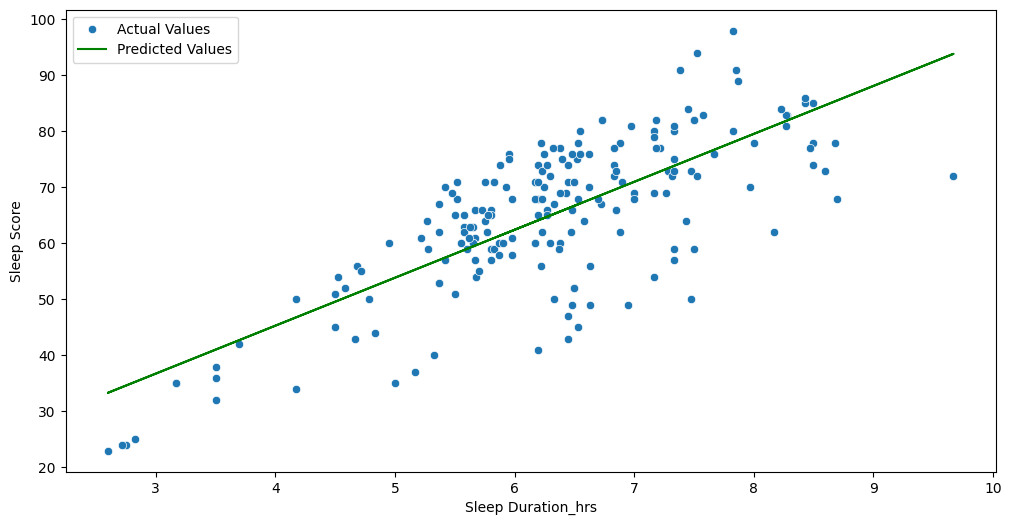

In [126]:
from sklearn.linear_model import LinearRegression
sleepduration_sLeepscore_model = LinearRegression()

x=df[['Sleep Duration_hrs']]
y=df['Sleep Score']

sleepduration_sLeepscore_model.fit(x,y)
sleepduration_sLeepscore_model.intercept_
sleepduration_sLeepscore_model.coef_
plt.figure(figsize = (12,6))
sns.scatterplot(x='Sleep Duration_hrs',y='Sleep Score', label = 'Actual Values', data=df)
duraion_sleep_quality_prediction=sleepduration_sLeepscore_model.predict(x)
plt.plot(x,duraion_sleep_quality_prediction, color='green', label='Predicted Values')
plt.legend()
plt.show()

In [127]:
#Sleep efficiency Calculation 

df['Sleep Efficiency (%)'] = (df['Sleep Duration_hrs'] / 
                               (df['Sleep Duration_hrs'] + df['Awake Time_hrs'])) * 100
print(f"Average Sleep Efficiency: {df['Sleep Efficiency (%)'].mean():.2f}%")

Average Sleep Efficiency: 96.37%


In [128]:
# Detect anomalies in Sleep Duration
anomalies = df[(df['Sleep Duration_hrs'] < 4) | (df['Sleep Duration_hrs'] > 10)]

print("Anomalies in Sleep Duration vs. Sleep Score:")
print(anomalies)


Anomalies in Sleep Duration vs. Sleep Score:
          Date        Day  Sleep Duration_hrs  Sleep Score Quality  \
39   2/10/2023     Friday                3.17         35.0    Poor   
40   2/11/2023   Saturday                3.17         35.0    Poor   
42   2/13/2023     Monday                2.83         25.0    Poor   
44   2/15/2023  Wednesday                3.50         36.0    Poor   
52   2/23/2023   Thursday                2.60         23.0    Poor   
62    3/5/2023     Sunday                3.50         32.0    Poor   
151   6/2/2023     Friday                2.75         24.0    Poor   
170  6/21/2023  Wednesday                3.70         42.0    Poor   
186   7/7/2023     Friday                2.72         24.0    Poor   
197  7/18/2023    Tuesday                3.50         38.0    Poor   

     Stress Avg  Deep Sleep Duration_hrs  Light Sleep Duration_hrs  \
39         25.0                     1.63                      1.38   
40         25.0                     1.63    

In [129]:
# Identify outliers using the IQR method
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers for each sleep stage
outliers_deep_sleep = detect_outliers('Deep Sleep Duration_hrs')
outliers_rem_sleep = detect_outliers('REM Duration_hrs')
outliers_light_sleep = detect_outliers('Light Sleep Duration_hrs')

# Print results
print("Outliers in Deep Sleep Duration:")
print(outliers_deep_sleep)
print("Outliers in REM Duration:")
print(outliers_rem_sleep)
print("Outliers in Light Sleep Duration:")
print(outliers_light_sleep)

outliers_deep_sleep.to_csv('outliers_deep_sleep.csv')
outliers_rem_sleep.to_csv('outliers_rem_sleep.csv')
outliers_light_sleep.to_csv('outliers_light_sleep.csv')


Outliers in Deep Sleep Duration:
          Date        Day  Sleep Duration_hrs  Sleep Score Quality  \
2     1/4/2023  Wednesday                7.50         82.0    Good   
63    3/6/2023     Monday                6.20         68.0    Fair   
155   6/6/2023    Tuesday                5.87         60.0    Fair   
159  6/10/2023   Saturday                6.45         71.0    Fair   
186   7/7/2023     Friday                2.72         24.0    Poor   

     Stress Avg  Deep Sleep Duration_hrs  Light Sleep Duration_hrs  \
2          10.0                     3.33                      3.32   
63         21.0                     3.28                      2.43   
155        10.0                     3.17                      3.60   
159        11.0                     3.50                      3.77   
186        49.0                     0.00                      2.72   

     REM Duration_hrs  Awake Time_hrs  Avg SpO?  Lowest SpO2  \
2                1.60            0.00      0.95         0.89 

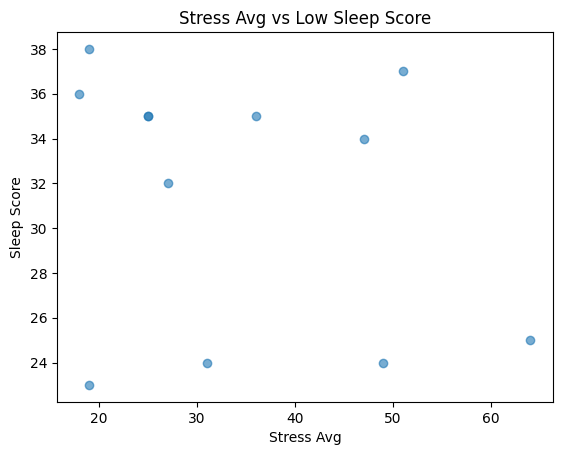

In [130]:
# Filter rows with low sleep scores (below 40)
low_sleep_score = df[df['Sleep Score'] < 40]


# Visualize stress vs. low sleep scores

plt.scatter(low_sleep_score['Stress Avg'], low_sleep_score['Sleep Score'], alpha=0.6)
plt.title('Stress Avg vs Low Sleep Score')
plt.xlabel('Stress Avg')
plt.ylabel('Sleep Score')
plt.show()

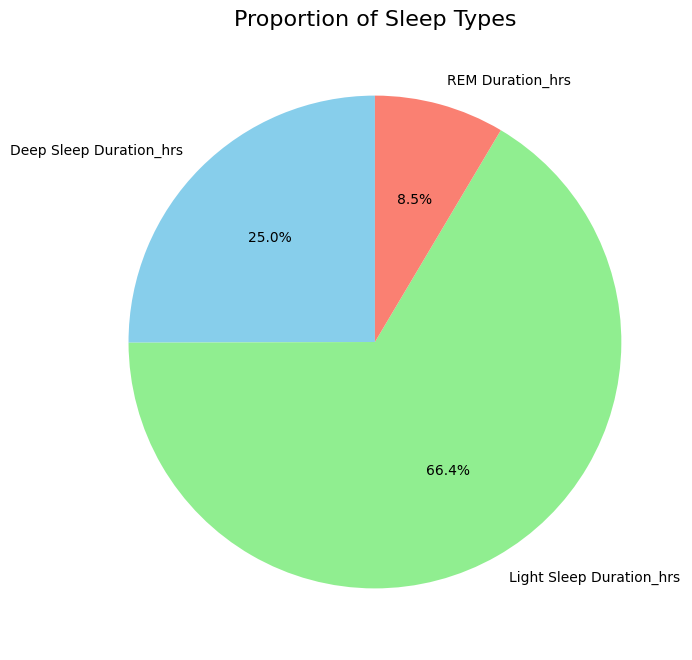

In [131]:
# Calculate total sleep duration
total_sleep = filtered_df[["Deep Sleep Duration_hrs", "Light Sleep Duration_hrs", "REM Duration_hrs"]].sum()

# Pie chart
plt.figure(figsize=(8, 8))
total_sleep.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'], startangle=90)

# Add labels
plt.title("Proportion of Sleep Types", fontsize=16)
plt.ylabel("")  # Remove y-axis label
plt.show()


<Figure size 1000x600 with 0 Axes>

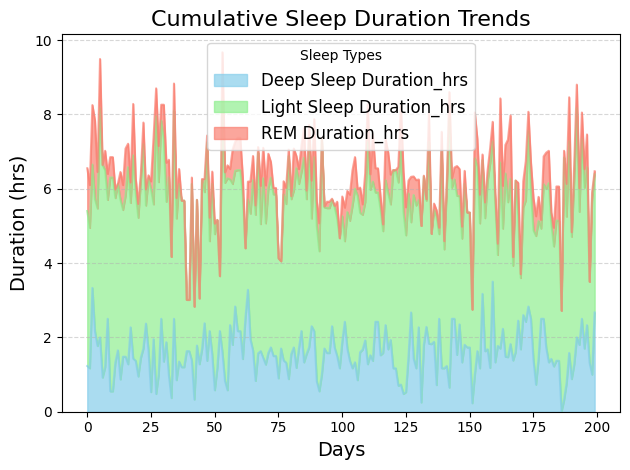

In [132]:
# Area chart
plt.figure(figsize=(10, 6))
filtered_df[["Deep Sleep Duration_hrs", "Light Sleep Duration_hrs", "REM Duration_hrs"]].plot(
    kind="area", stacked=True, alpha=0.7, color=['skyblue', 'lightgreen', 'salmon']
)

# Add labels
plt.title("Cumulative Sleep Duration Trends", fontsize=16)
plt.ylabel("Duration (hrs)", fontsize=14)
plt.xlabel("Days", fontsize=14)
plt.legend(title="Sleep Types", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_6068\2706362640.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_df["Avg SpO?"], label="Avg SpO₂", shade=True, color="blue")
C:\Users\HP\AppData\Local\Temp\ipykernel_6068\2706362640.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_df["Lowest SpO2"], label="Lowest SpO₂", shade=True, color="red")


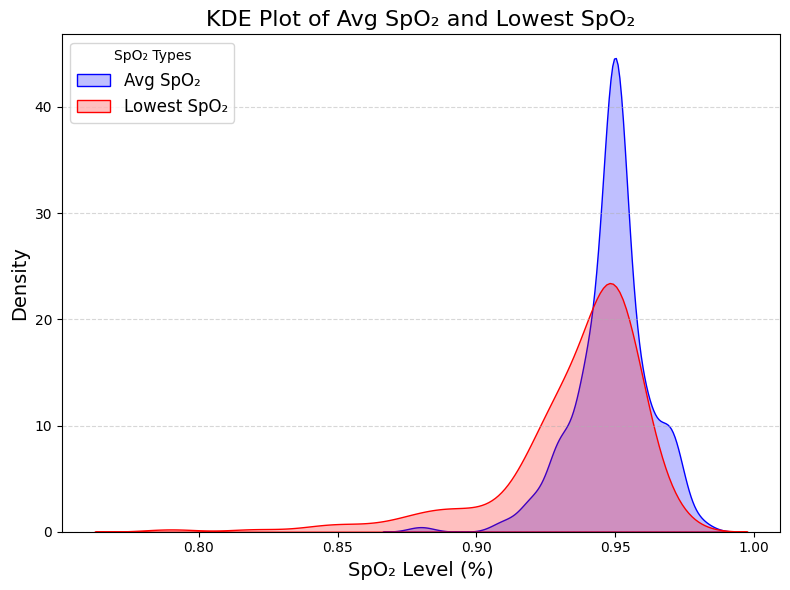

In [133]:
# KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(filtered_df["Avg SpO?"], label="Avg SpO₂", shade=True, color="blue")
sns.kdeplot(filtered_df["Lowest SpO2"], label="Lowest SpO₂", shade=True, color="red")

# Add labels and title
plt.title("KDE Plot of Avg SpO₂ and Lowest SpO₂", fontsize=16)
plt.xlabel("SpO₂ Level (%)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title="SpO₂ Types", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


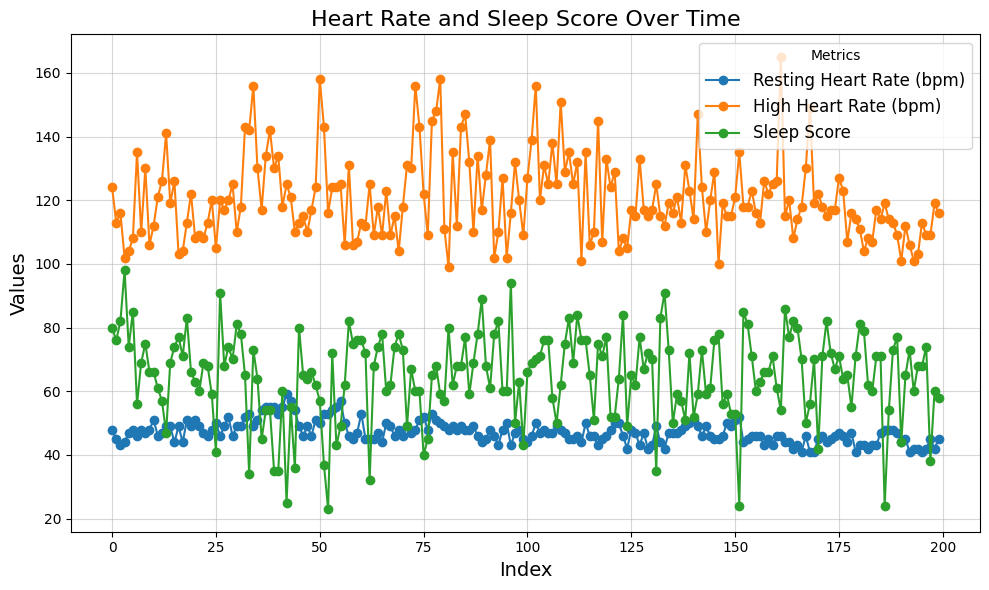

In [134]:

# Ensure the relevant columns exist in the DataFrame
columns_to_plot = ["Resting Heart Rate (bpm)", "High Heart Rate (bpm)", "Sleep Score"]

filtered_columns = [col for col in columns_to_plot if col in filtered_df.columns]

# Line plot
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(filtered_df[column], marker='o', label=column)

# Add labels and title
plt.title("Heart Rate and Sleep Score Over Time", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.legend(title="Metrics", fontsize=12)
plt.grid(alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()


Standard Deviation of Deep Sleep Duration: 0.63
Standard Deviation of REM Sleep Duration: 0.43
Standard Deviation of Light Sleep Duration: 1.08


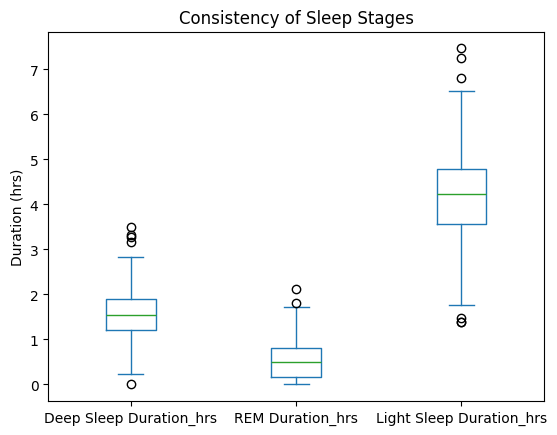

In [135]:
# Calculate standard deviation for each sleep stage
std_deep_sleep = df['Deep Sleep Duration_hrs'].std()
std_rem_sleep = df['REM Duration_hrs'].std()
std_light_sleep = df['Light Sleep Duration_hrs'].std()

# Print the standard deviations
print(f"Standard Deviation of Deep Sleep Duration: {std_deep_sleep:.2f}")
print(f"Standard Deviation of REM Sleep Duration: {std_rem_sleep:.2f}")
print(f"Standard Deviation of Light Sleep Duration: {std_light_sleep:.2f}")

# Visualize consistency using boxplots
df[['Deep Sleep Duration_hrs', 'REM Duration_hrs', 'Light Sleep Duration_hrs']].plot.box()
plt.title('Consistency of Sleep Stages')
plt.ylabel('Duration (hrs)')
plt.show()


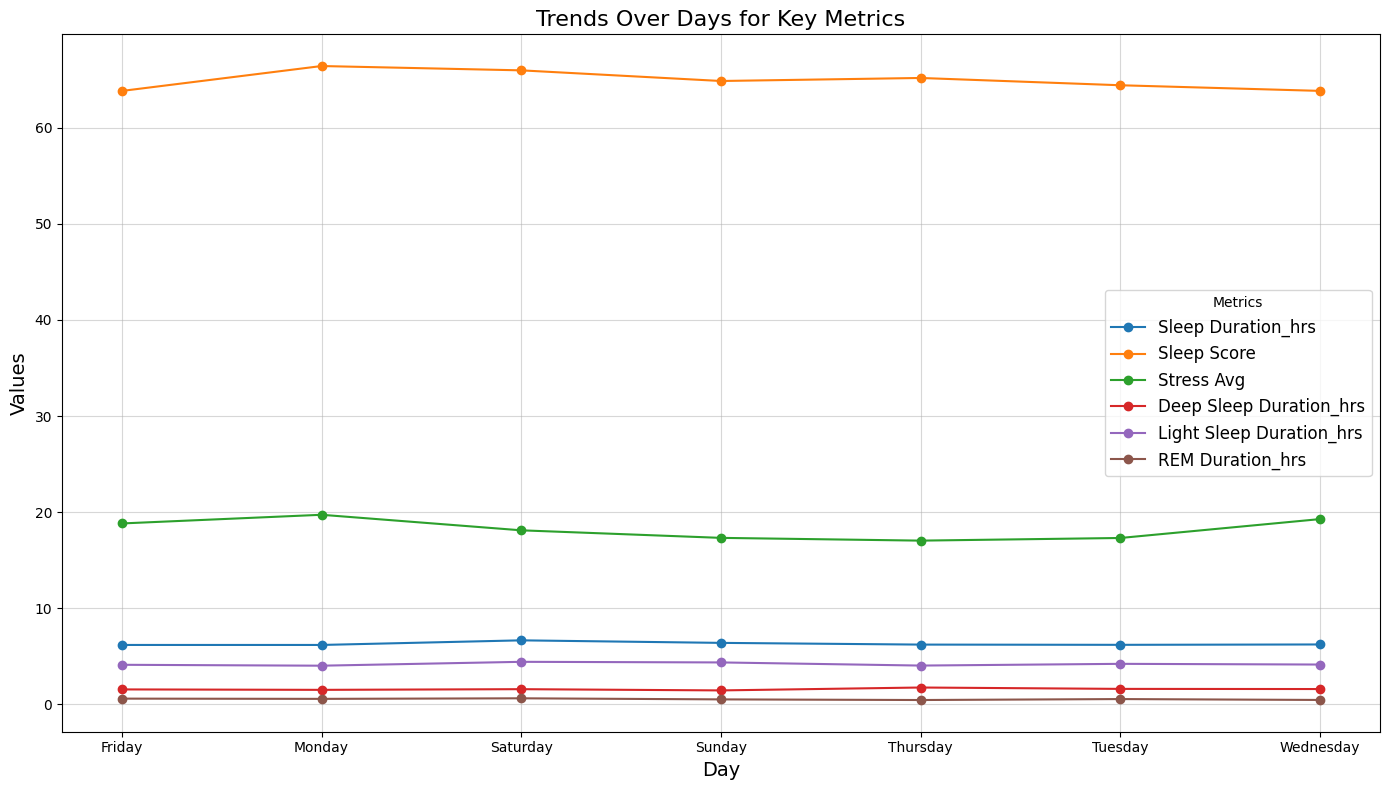

In [136]:

# List of columns to analyze trends
columns_to_analyze = [
    'Sleep Duration_hrs', 'Sleep Score', 'Stress Avg',
    'Deep Sleep Duration_hrs', 'Light Sleep Duration_hrs',
    'REM Duration_hrs', 
]

# Group by Day and calculate daily means for the selected columns
daily_trends = df.groupby('Day')[columns_to_analyze].mean()

# Plotting trends for selected columns
plt.figure(figsize=(14, 8))
for column in columns_to_analyze:
    plt.plot(daily_trends.index, daily_trends[column], marker='o', label=column)

# Add labels and title
plt.title("Trends Over Days for Key Metrics", fontsize=16)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.legend(title="Metrics", fontsize=12)
plt.grid(alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()


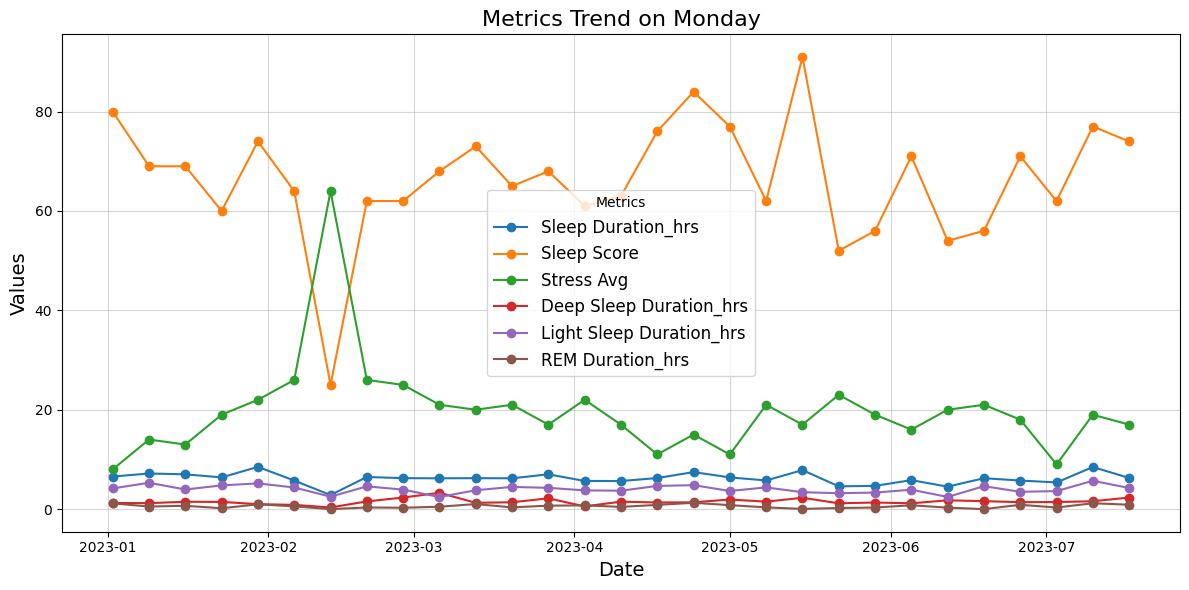

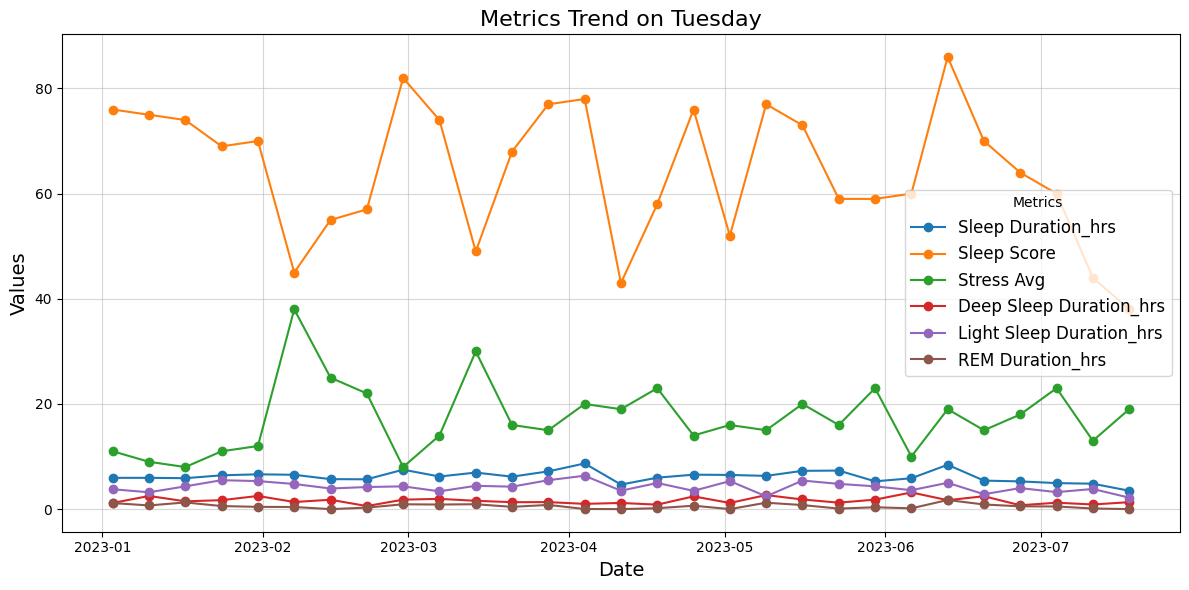

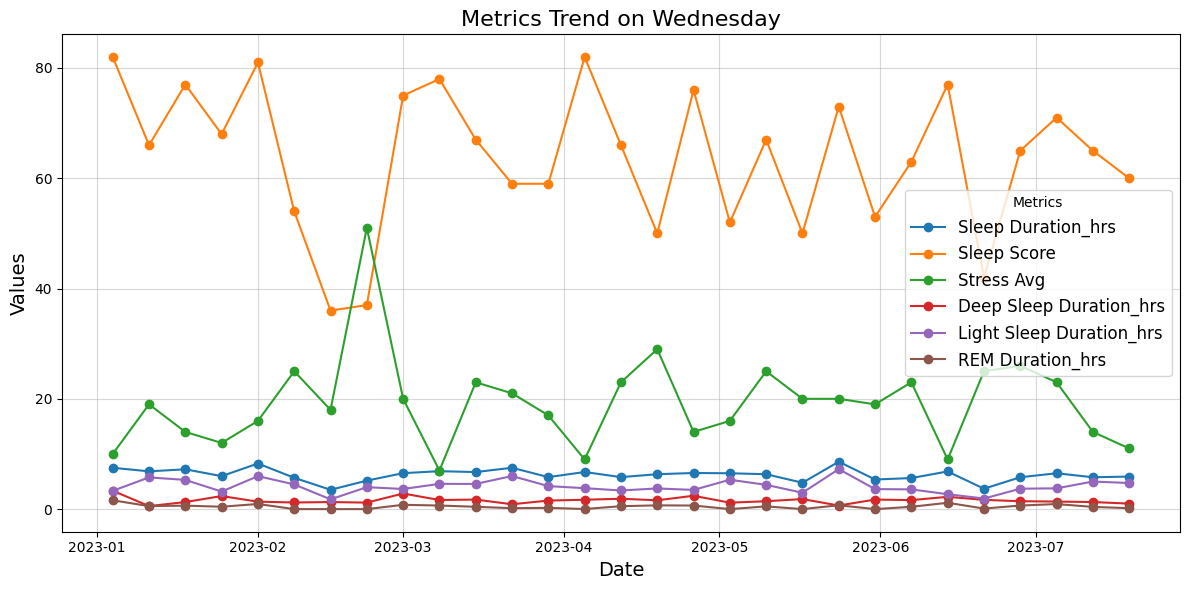

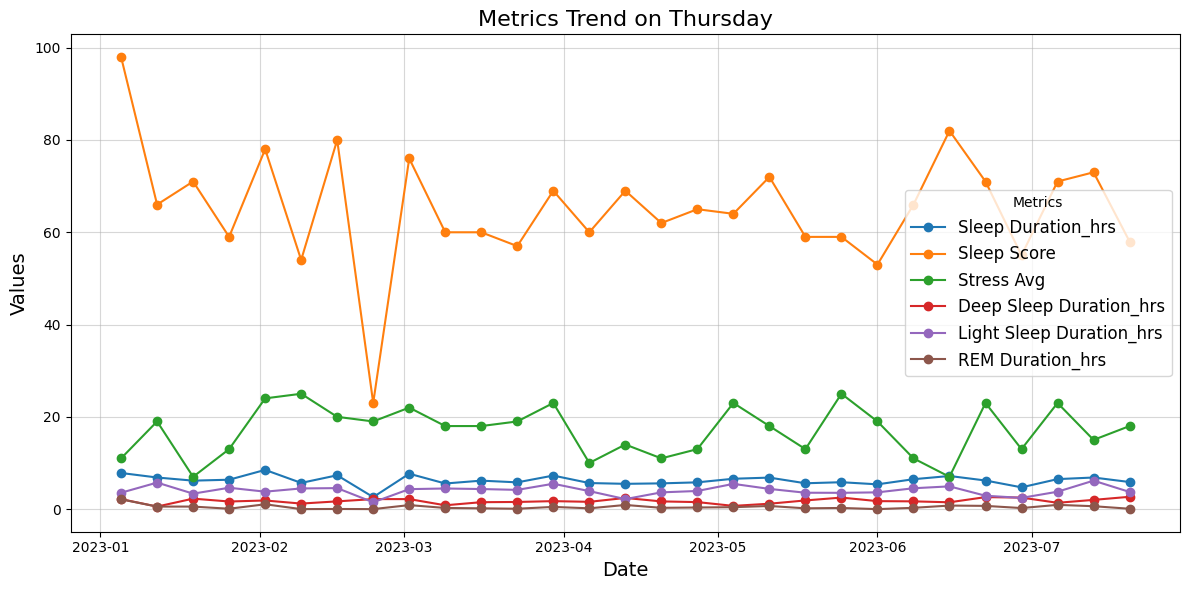

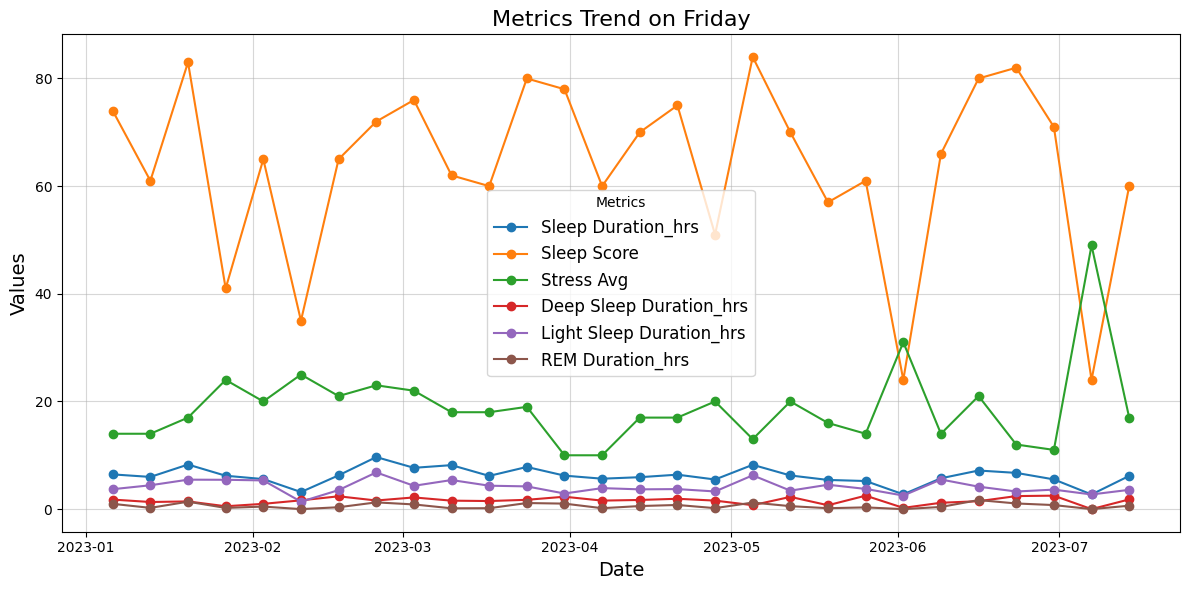

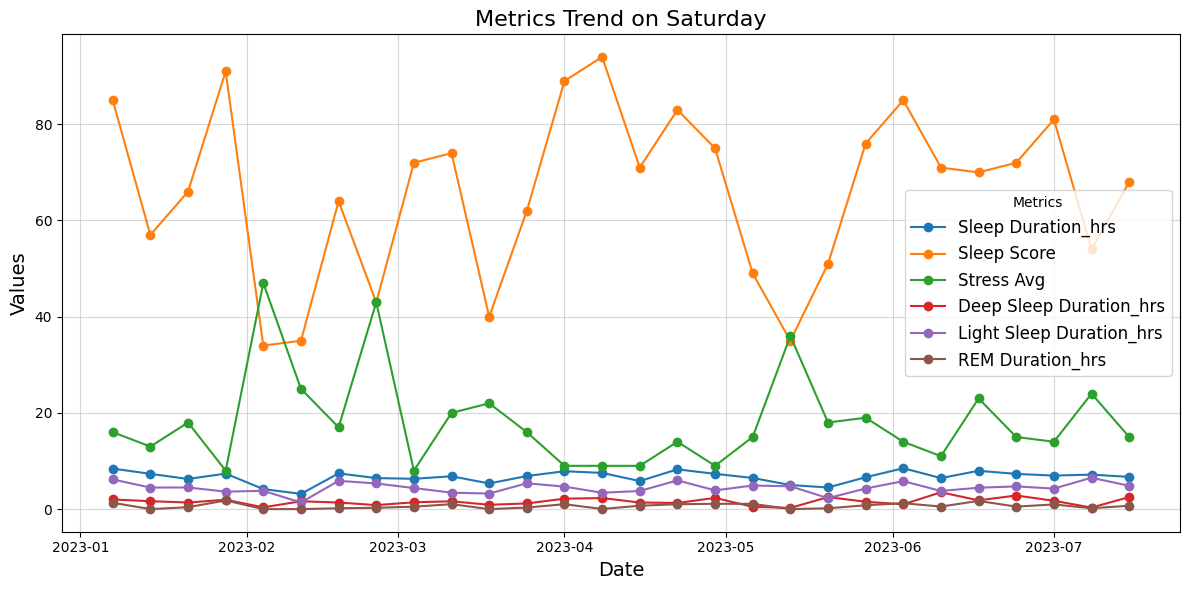

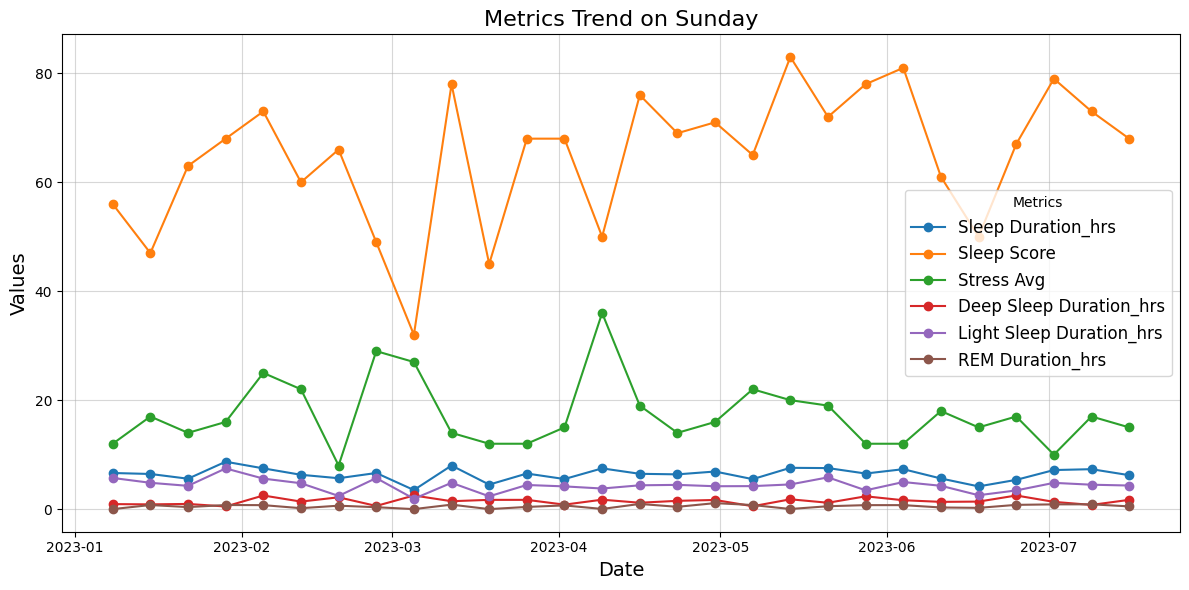

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the dataset has a 'Date' column. If not, create one with dummy values
if 'Date' not in df.columns:
    df['Date'] = pd.date_range(start="2023-01-01", periods=len(df), freq='D')  # Generate dummy dates

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract the day of the week from the 'Date' column
df['Day of Week'] = df['Date'].dt.day_name()

# List of columns to analyze
columns_to_analyze = [
    'Sleep Duration_hrs', 'Sleep Score', 'Stress Avg',
    'Deep Sleep Duration_hrs', 'Light Sleep Duration_hrs',
    'REM Duration_hrs', 
]

# Generate a separate plot for each day of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in ordered_days:
    # Filter data for the specific day
    day_data = df[df['Day of Week'] == day]

    # Plot all metrics for this day
    plt.figure(figsize=(12, 6))
    for column in columns_to_analyze:
        plt.plot(day_data['Date'], day_data[column], marker='o', label=column)

    # Add labels, title, and legend
    plt.title(f"Metrics Trend on {day}", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Values", fontsize=14)
    plt.legend(title="Metrics", fontsize=12)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()


Comparison between Weekdays and Weekends:
           Sleep Duration_hrs  Sleep Score  Stress Avg  \
Week Type                                                
Weekday              6.200486    64.736111   18.430556   
Weekend              6.528036    65.410714   17.714286   

           Deep Sleep Duration_hrs  Light Sleep Duration_hrs  \
Week Type                                                      
Weekday                   1.603611                  4.106042   
Weekend                   1.514643                  4.393393   

           REM Duration_hrs  Resting Heart Rate (bpm)  
Week Type                                              
Weekday            0.524514                 47.354167  
Weekend            0.572857                 46.928571  


<Figure size 1400x800 with 0 Axes>

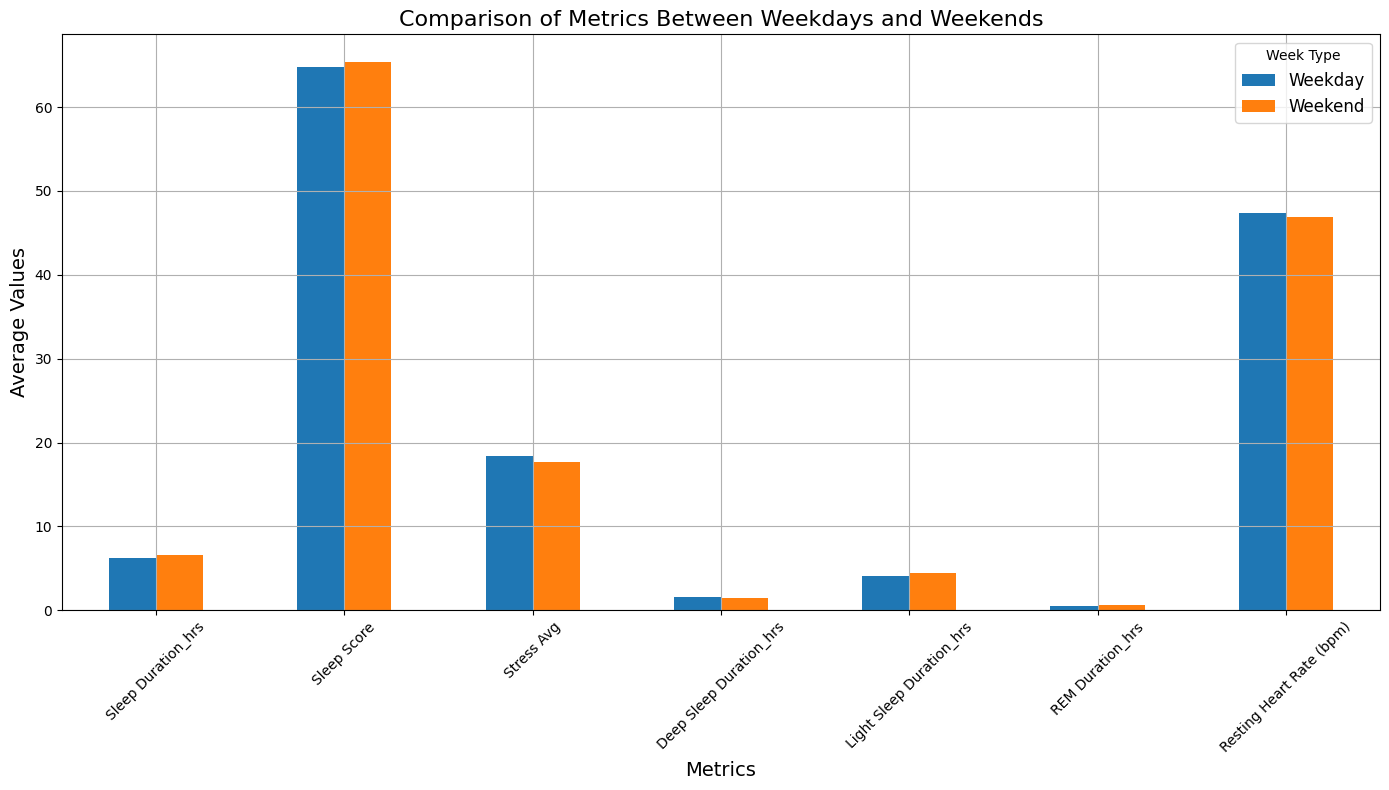

In [138]:

# Assuming 'Day' column already exists, categorize into Weekdays and Weekends
df['Week Type'] = df['Day'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

# List of columns to analyze
columns_to_analyze = [
    'Sleep Duration_hrs', 'Sleep Score', 'Stress Avg',
    'Deep Sleep Duration_hrs', 'Light Sleep Duration_hrs',
    'REM Duration_hrs', 'Resting Heart Rate (bpm)'
]

# Group by Week Type (Weekday or Weekend) and calculate mean values
week_comparison = df.groupby('Week Type')[columns_to_analyze].mean()

# Display the comparison data
print("Comparison between Weekdays and Weekends:")
print(week_comparison)

# Plot the comparison
plt.figure(figsize=(14, 8))
week_comparison.T.plot(kind='bar', figsize=(14, 8), rot=45, grid=True)

# Add labels and title
plt.title("Comparison of Metrics Between Weekdays and Weekends", fontsize=16)
plt.ylabel("Average Values", fontsize=14)
plt.xlabel("Metrics", fontsize=14)
plt.legend(title="Week Type", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()
